In [1]:
import vonenet
import torchvision
import torch
import deeplake
import numpy as np
import matplotlib.pyplot as plt


/home/jasmeet/anaconda3/envs/vonenet/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jasmeet/anaconda3/envs/vonenet/lib/python3.6/site-packages/deeplake/util/check_latest_version.py:33: UserWarning: A newer version of deeplake (3.1.1) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  f"A newer version of deeplake ({latest_version}) is available. It's recommended that you update to the latest version using `pip install -U deeplake`."


Neuronal distributions gabor parameters
***check*****
[0 1]
***check*****
[0. 1.]
***check*****
[0. 1.]
***check*****
[0. 1.]
***check*****
[0. 1.]
*******************
Model:  VOneNet
VOneBlock(
  (simple_conv_q00): GFB()
  (simple_conv_q01): GFB()
  (simple_conv_q10): GFB()
  (simple_conv_q11): GFB()
  (simple_conv_q20): GFB()
  (simple_conv_q21): GFB()
  (simple_conv_q30): GFB()
  (simple_conv_q31): GFB()
  (simple): ReLU(inplace=True)
  (complex): Identity()
  (gabors): Identity()
  (noise): ReLU(inplace=True)
  (output): Identity()
)


/home/jasmeet/vonenet/vonenet/params.py:76: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)
/home/jasmeet/anaconda3/envs/vonenet/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([16, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 512, 56, 56])


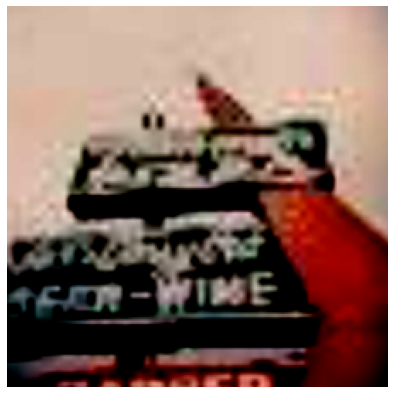

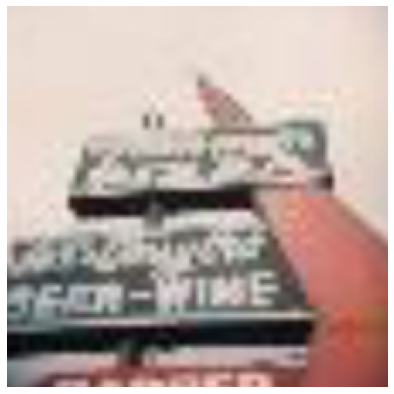

array([ 21, 277, 405, 184,  56, 162, 174,  46, 218, 163, 268, 396, 189,
       140,  35, 220, 401, 273,  34,  12, 186, 393, 265, 348, 474, 234,
       440, 312, 175, 137, 476, 183, 148, 418,  92, 346,  86, 279, 407,
       246, 362, 314, 442, 290, 502, 490, 404, 276, 149, 294, 422, 106,
       374, 185, 214, 133,  58,  90,  20,  17, 302, 132, 129, 206,   9,
       445, 317,  13, 230,  38, 430, 145, 247, 266, 394, 157, 209, 202,
       169,  23, 342, 118, 470, 419, 291, 254, 269, 358,  61, 219, 172,
       260, 388, 397, 486, 151, 126,   4, 161, 188, 458, 330, 226, 165,
       144, 166,   1, 134,  78, 156, 141, 102, 334, 347, 475, 462, 375,
       235, 503, 239, 178, 182, 224, 385, 257, 253, 244, 222, 119, 285,
       487, 146, 138, 176, 199, 413,  29,  55, 359, 382, 510, 428, 300,
       201, 153, 240, 389, 261, 455, 242, 327, 231, 187, 154, 444, 208,
       400, 250, 272, 103, 195, 316, 232,  57, 213, 136, 249, 152, 252,
       180, 412, 284,   5, 196, 216,  60,  44,  91, 350,  47, 50

In [2]:
v1_model = vonenet.get_model(model_arch=None, pretrained=False, noise_mode=None).module
# v1_model = vonenet.get_model(model_arch=None, pretrained=False, noise_mode=None, image_size=32, visual_degrees=3, sf_max=5, stride=1, ksize=15).module
#v1_model = vonenet.get_model(model_arch='resnet50_ns', pretrained=True).module

print(v1_model)

data_path = '/home/jasmeet/vonenet/tiny-imagenet-200/val'

bsize = 16
crop = 256 # 48  256
px = 224 # 32  224

normalize = torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                             std=[0.5, 0.5, 0.5])
dataset = torchvision.datasets.ImageFolder(data_path,
    torchvision.transforms.Compose([
        torchvision.transforms.Resize(crop),
        torchvision.transforms.CenterCrop(px),
        torchvision.transforms.ToTensor(),
        normalize,
    ]))

data_loader = torch.utils.data.DataLoader(dataset, batch_size=bsize, shuffle=True, num_workers=6, pin_memory=True)

dataloader_iterator = iter(data_loader)
X, _ = next(dataloader_iterator)
print(X.shape)

activations = v1_model(X)
print(activations.shape)
im_ind = 15
input_im = np.moveaxis(X[im_ind].numpy(), 0, -1)
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(7, 7)
im_h = ax.imshow(input_im)
im_h.set_clim([0, 1])
ax.set_axis_off()
plt.show()

im_ind = 15
input_im = input_im / 2 + 0.5
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(7, 7)
im_h = ax.imshow(input_im)
im_h.set_clim([0, 1])
ax.set_axis_off()
plt.show()

np.argsort(np.std(activations[im_ind].numpy().reshape((512, -1)), axis=1))



[102 120]
0 102
1 120


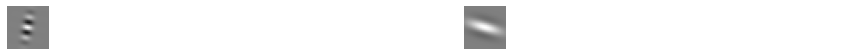

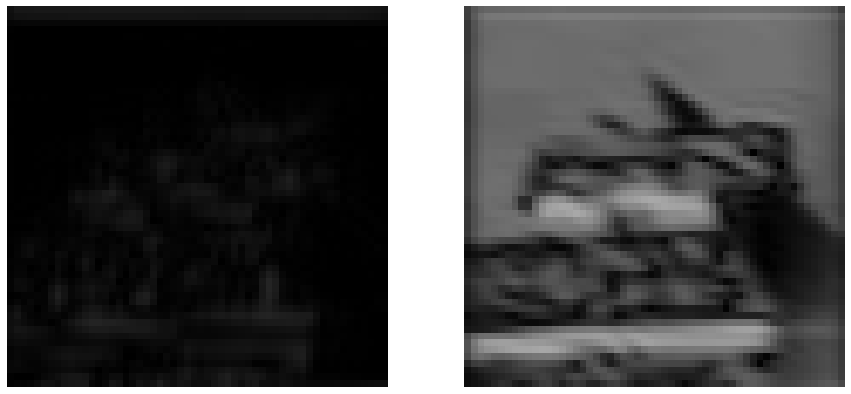

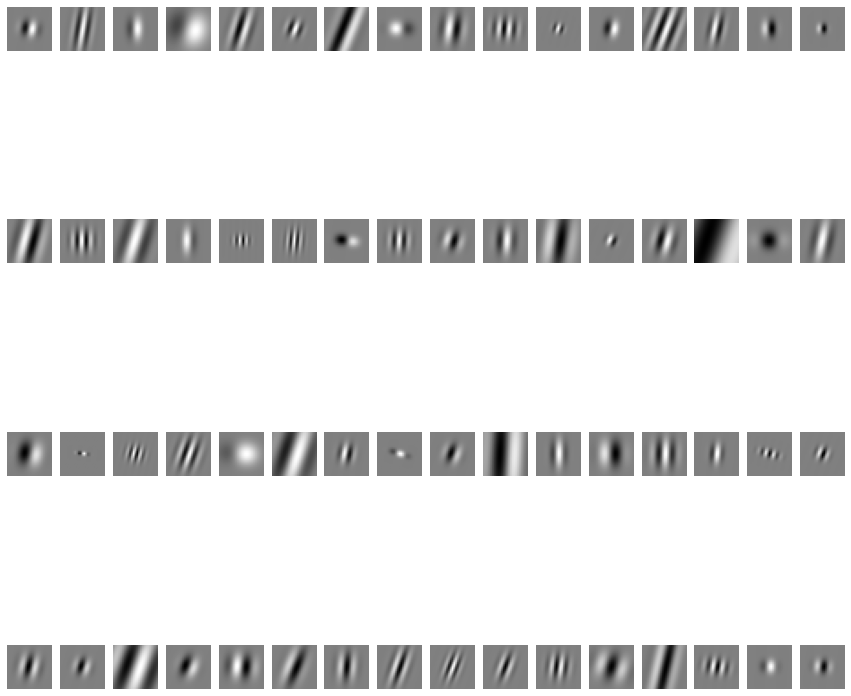

9.899494936611665


In [15]:

v1_ind=np.array([102,120])
print(v1_ind)
fig, ax = plt.subplots(nrows=1, ncols=len(v1_ind))
fig.set_size_inches(15,5)
for v1_i, v1_ind_ in enumerate(v1_ind):
    print(v1_i,v1_ind_)
    v1_k = v1_model.simple_conv_q01.weight[v1_ind_,:,:,:].numpy().mean(axis=0)
    v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
    im_h=ax[v1_i].imshow(v1_k, cmap='gray')
    ax[v1_i].set_xlim([0, px])
    im_h.set_clim([0, 1])
    ax[v1_i].set_axis_off()
plt.show()


fig, ax = plt.subplots(nrows=1, ncols=len(v1_ind))
fig.set_size_inches(15,15)
max_activations = np.amax(activations[im_ind].numpy())/np.sqrt(2)
for v1_i, v1_ind_ in enumerate(v1_ind):
    v1_im = activations[im_ind,v1_ind_].numpy()
    v1_im = v1_im / max_activations
    im_h=ax[v1_i].imshow(v1_im, cmap='gray')
    im_h.set_clim([0, 1])
    ax[v1_i].set_axis_off()
plt.show()


num_channels=64
max_columns = 16

fig, ax = plt.subplots(nrows=num_channels//max_columns, ncols=max_columns)

fig.set_size_inches(15,15)
for i in range(num_channels):
    v1_k = v1_model.simple_conv_q11.weight[i,:,:,:].numpy().mean(axis=0)
    v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
    im_h=ax[i//max_columns, np.mod(i,max_columns)].imshow(v1_k, cmap='gray')
#     ax[i//num_channels, np.mod(i,num_channels)].set_xlim([0, 223])
    im_h.set_clim([0, 1])
    ax[i//max_columns, np.mod(i,max_columns)].set_axis_off()
plt.show()

for i in range(num_channels):
    v1_k = v1_model.simple_conv_q11.weight[i,:,:,:].numpy().mean(axis=0)
    v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
    im_h=ax[i//max_columns, np.mod(i,max_columns)].imshow(v1_k, cmap='gray')
#     ax[i//num_channels, np.mod(i,num_channels)].set_xlim([0, 223])
    im_h.set_clim([0, 1])
    ax[i//max_columns, np.mod(i,max_columns)].set_axis_off()
plt.show()

for i in range(num_channels):
    v1_k = v1_model.simple_conv_q21.weight[i,:,:,:].numpy().mean(axis=0)
    v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
    im_h=ax[i//max_columns, np.mod(i,max_columns)].imshow(v1_k, cmap='gray')
#     ax[i//num_channels, np.mod(i,num_channels)].set_xlim([0, 223])
    im_h.set_clim([0, 1])
    ax[i//max_columns, np.mod(i,max_columns)].set_axis_off()
plt.show()


visual_degrees = 8
image_size = 224

nyquist_f = 1/(visual_degrees/image_size)/2 / np.sqrt(2)

print(nyquist_f)